Accuracy - Linear Kernel: 0.9766081871345029
Accuracy - Radial Kernel: 0.9766081871345029
Accuracy - Sigmoid Kernel: 0.9649122807017544
Accuracy - Polynomial Kernel: 0.9883040935672515


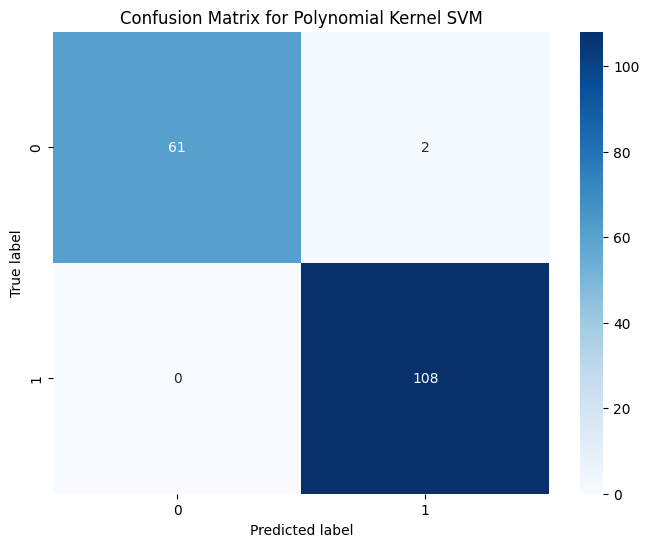

Best Parameters: {'C': 1, 'coef0': 1, 'degree': 4, 'gamma': 'scale'}
Accuracy of Best Model: 97.6608187134503


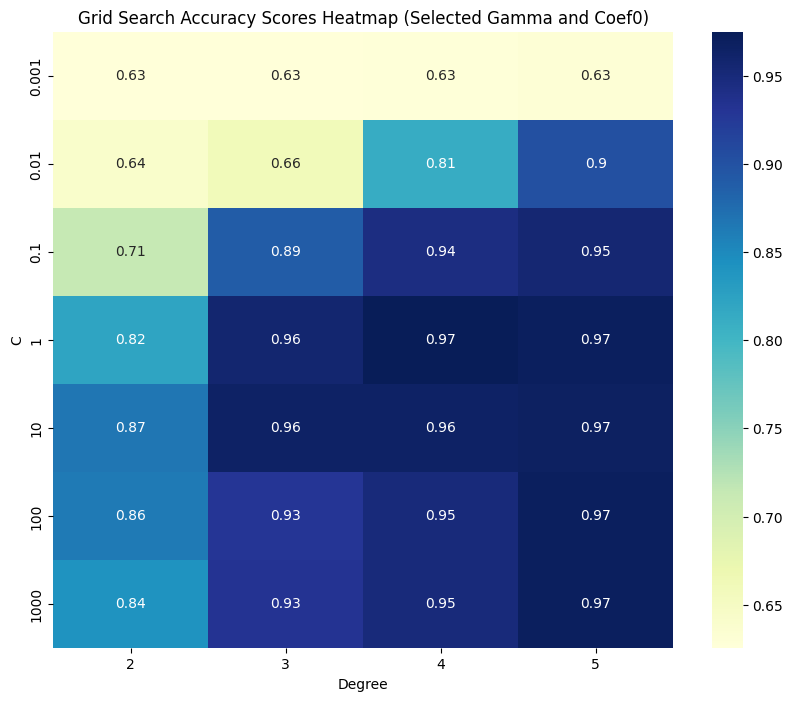

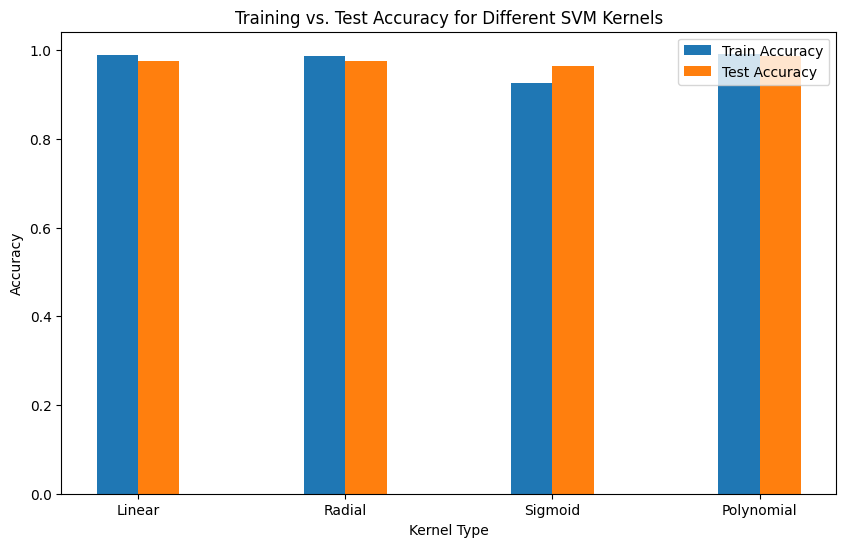

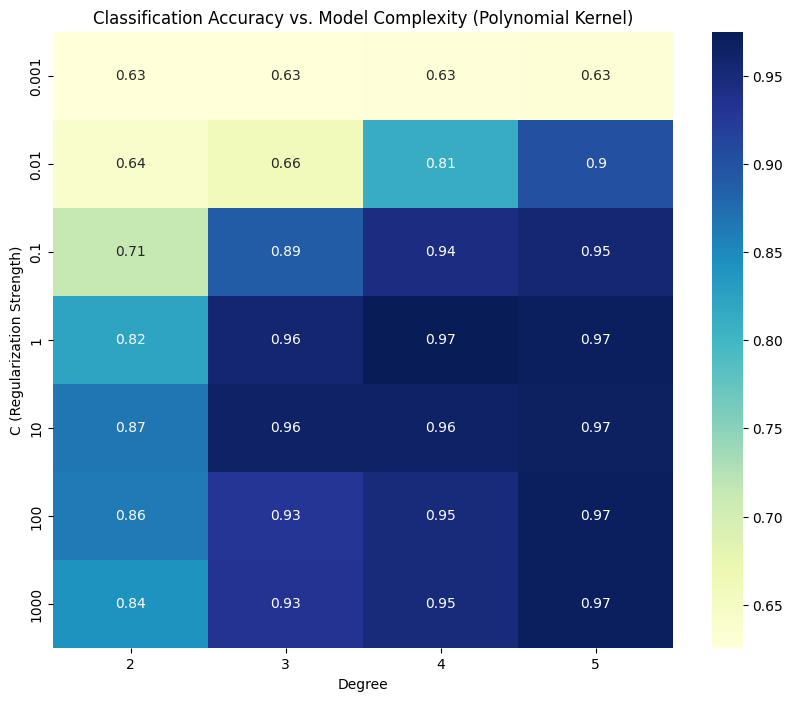

In [1]:
"""
Author: Shubham
"""

import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Note: Use transform here, not fit_transform

# Train SVM models with different kernels
svm_model_linear = SVC(kernel='linear').fit(X_train_scaled, y_train)
svm_model_radial = SVC(kernel='rbf', gamma='scale').fit(X_train_scaled, y_train)
svm_model_sigmoid = SVC(kernel='sigmoid', gamma='scale', coef0=0).fit(X_train_scaled, y_train)
svm_model_poly = SVC(kernel='poly', degree=3, coef0=1).fit(X_train_scaled, y_train)

# Make predictions with each model
y_pred_linear = svm_model_linear.predict(X_test_scaled)
y_pred_radial = svm_model_radial.predict(X_test_scaled)
y_pred_sigmoid = svm_model_sigmoid.predict(X_test_scaled)
y_pred_poly = svm_model_poly.predict(X_test_scaled)

# Calculate and print accuracy for each model
print("Accuracy - Linear Kernel:", accuracy_score(y_test, y_pred_linear))
print("Accuracy - Radial Kernel:", accuracy_score(y_test, y_pred_radial))
print("Accuracy - Sigmoid Kernel:", accuracy_score(y_test, y_pred_sigmoid))
print("Accuracy - Polynomial Kernel:", accuracy_score(y_test, y_pred_poly))

# Plotting confusion matrix for the polynomial kernel model
cm = confusion_matrix(y_test, y_pred_poly)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Polynomial Kernel SVM')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Perform Grid Search for hyperparameter tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'degree': [2, 3, 4, 5],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1, 10],
    'coef0': [0.0, 0.1, 0.5, 1]
}
grid_search = GridSearchCV(svm_model_poly, param_grid, cv=5, scoring='accuracy', n_jobs=3)
grid_search.fit(X_train_scaled, y_train)

# Print best parameters and accuracy of the best model
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)
print("Accuracy of Best Model:", accuracy_score(y_test, y_pred_best) * 100)

# Generating a heatmap from the grid search results
# We extract the mean test scores and reshape them according to the parameter grid
scores_matrix = grid_search.cv_results_['mean_test_score'].reshape(len(param_grid['C']),
                                                                    len(param_grid['degree']),
                                                                    len(param_grid['gamma']),
                                                                    len(param_grid['coef0']))

# Here, we are selecting a specific 'gamma' and 'coef0' to visualize as an example
selected_gamma_index = 0  # Index corresponding to 'scale' in the 'gamma' list
selected_coef0_index = 0  # Index corresponding to 0.0 in the 'coef0' list

# Plotting the heatmap for the selected slice of hyperparameters
plt.figure(figsize=(10, 8))
sns.heatmap(scores_matrix[:, :, selected_gamma_index, selected_coef0_index], annot=True, cmap='YlGnBu',
            xticklabels=param_grid['degree'], yticklabels=param_grid['C'])
plt.title('Grid Search Accuracy Scores Heatmap (Selected Gamma and Coef0)')
plt.xlabel('Degree')
plt.ylabel('C')
plt.show()

train_accuracy_linear = accuracy_score(y_train, svm_model_linear.predict(X_train_scaled))
train_accuracy_radial = accuracy_score(y_train, svm_model_radial.predict(X_train_scaled))
train_accuracy_sigmoid = accuracy_score(y_train, svm_model_sigmoid.predict(X_train_scaled))
train_accuracy_poly = accuracy_score(y_train, svm_model_poly.predict(X_train_scaled))

# Plotting Training vs. Test Accuracy for each kernel
plt.figure(figsize=(10, 6))
bar_width = 0.2
index = np.arange(4)

bar1 = plt.bar(index, [train_accuracy_linear, train_accuracy_radial, train_accuracy_sigmoid, train_accuracy_poly], bar_width, label='Train Accuracy')
bar2 = plt.bar(index + bar_width, [accuracy_score(y_test, y_pred_linear), accuracy_score(y_test, y_pred_radial), accuracy_score(y_test, y_pred_sigmoid), accuracy_score(y_test, y_pred_poly)], bar_width, label='Test Accuracy')

plt.xlabel('Kernel Type')
plt.ylabel('Accuracy')
plt.title('Training vs. Test Accuracy for Different SVM Kernels')
plt.xticks(index + bar_width / 2, ['Linear', 'Radial', 'Sigmoid', 'Polynomial'])
plt.legend()
plt.show()

# Plotting Classification Metric vs. Model Complexity
# Extracting mean test scores for a specific 'gamma' and 'coef0'
mean_test_scores = scores_matrix[:, :, selected_gamma_index, selected_coef0_index]

# Plotting heatmap for each 'C' and 'degree' combination
plt.figure(figsize=(10, 8))
sns.heatmap(mean_test_scores, annot=True, cmap='YlGnBu', xticklabels=param_grid['degree'], yticklabels=param_grid['C'])
plt.title('Classification Accuracy vs. Model Complexity (Polynomial Kernel)')
plt.xlabel('Degree')
plt.ylabel('C (Regularization Strength)')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Accuracy - Linear Kernel: 0.75
Accuracy - Radial Kernel: 0.79
Accuracy - Sigmoid Kernel: 0.7533333333333333
Accuracy - Polynomial Kernel: 0.7966666666666666


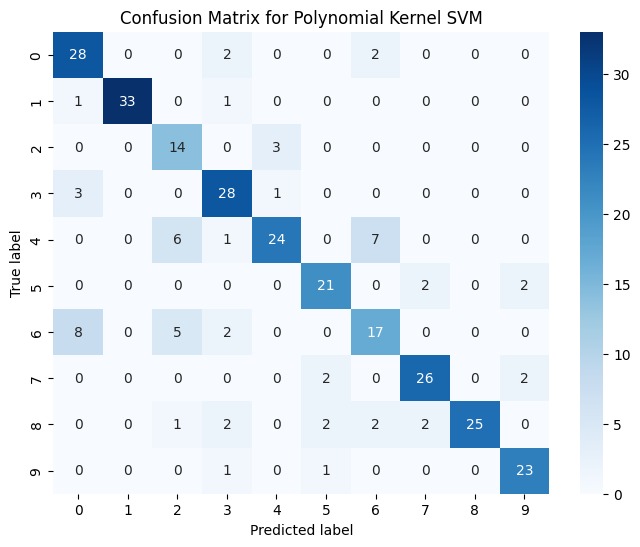

Best Parameters: {'C': 0.1, 'coef0': 1, 'degree': 3, 'gamma': 0.01}
Accuracy of Best Model: 76.66666666666667


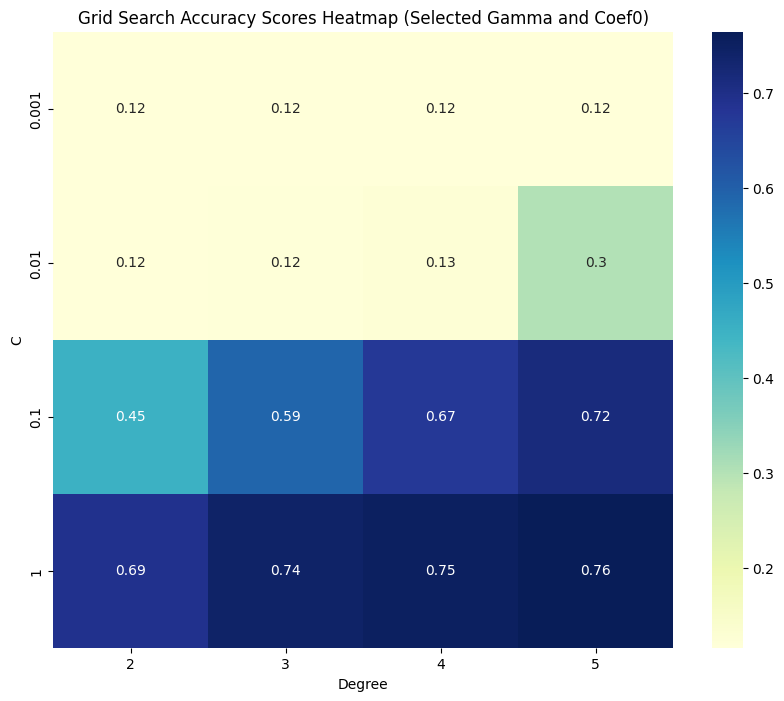

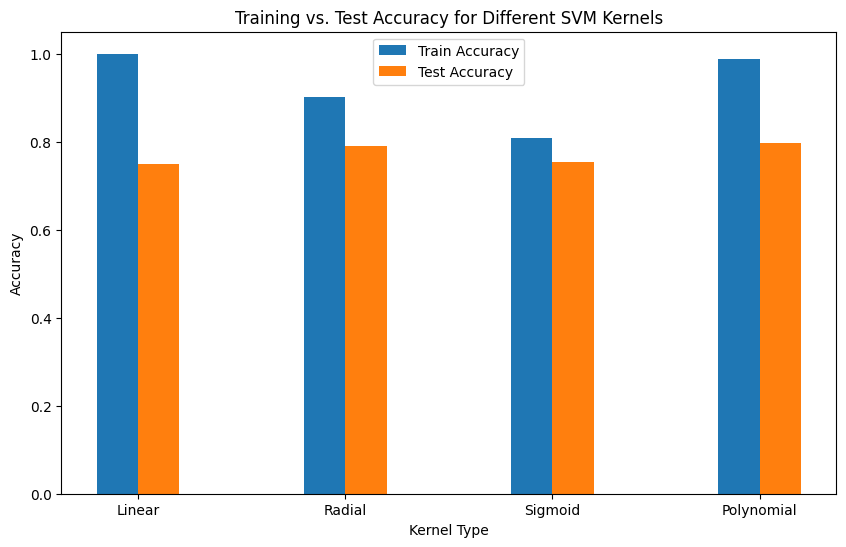

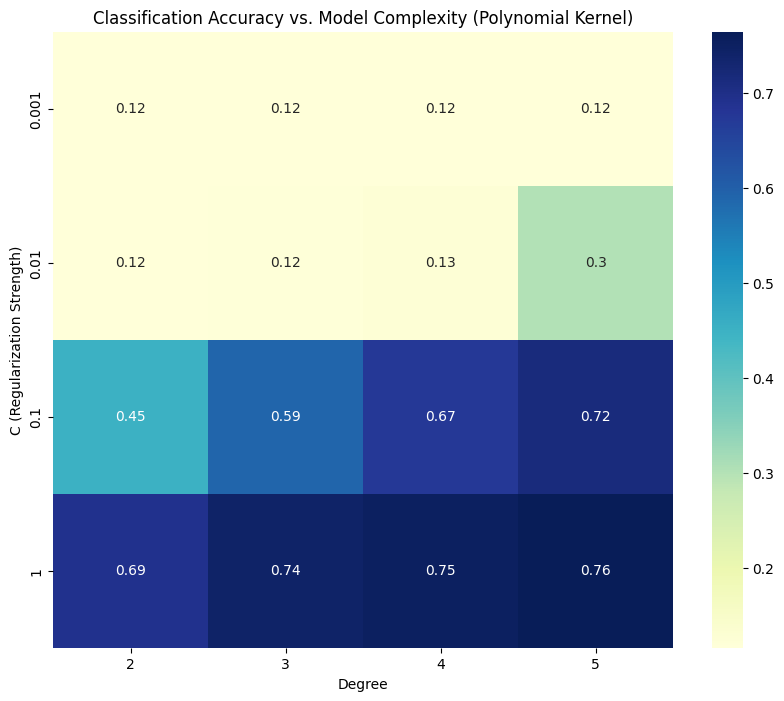

In [2]:
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss, classification_report, accuracy_score, confusion_matrix
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fashion_mnist = fetch_openml('Fashion-MNIST')
X = fashion_mnist.data
y = fashion_mnist.target.astype(int)

X_subset, _, y_subset, _ = train_test_split(X, y, train_size=1000, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_subset, y_subset, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  

svm_model_linear = SVC(kernel='linear').fit(X_train_scaled, y_train)
svm_model_radial = SVC(kernel='rbf', gamma='scale').fit(X_train_scaled, y_train)
svm_model_sigmoid = SVC(kernel='sigmoid', gamma='scale', coef0=0).fit(X_train_scaled, y_train)
svm_model_poly = SVC(kernel='poly', degree=3, coef0=1).fit(X_train_scaled, y_train)

y_pred_linear = svm_model_linear.predict(X_test_scaled)
y_pred_radial = svm_model_radial.predict(X_test_scaled)
y_pred_sigmoid = svm_model_sigmoid.predict(X_test_scaled)
y_pred_poly = svm_model_poly.predict(X_test_scaled)

print("Accuracy - Linear Kernel:", accuracy_score(y_test, y_pred_linear))
print("Accuracy - Radial Kernel:", accuracy_score(y_test, y_pred_radial))
print("Accuracy - Sigmoid Kernel:", accuracy_score(y_test, y_pred_sigmoid))
print("Accuracy - Polynomial Kernel:", accuracy_score(y_test, y_pred_poly))

cm = confusion_matrix(y_test, y_pred_poly)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Polynomial Kernel SVM')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

param_grid = {
    'C': [0.001, 0.01, 0.1, 1],
    'degree': [2, 3, 4, 5],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'coef0': [0.0, 0.1, 0.5, 1]
}
grid_search = GridSearchCV(svm_model_poly, param_grid, cv=5, scoring='accuracy', n_jobs=3)
grid_search.fit(X_train_scaled, y_train)

# Print best parameters and accuracy of the best model
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)
print("Accuracy of Best Model:", accuracy_score(y_test, y_pred_best) * 100)


scores_matrix = grid_search.cv_results_['mean_test_score'].reshape(len(param_grid['C']),
                                                                    len(param_grid['degree']),
                                                                    len(param_grid['gamma']),
                                                                    len(param_grid['coef0']))

selected_gamma_index = 0  
selected_coef0_index = 0  

plt.figure(figsize=(10, 8))
sns.heatmap(scores_matrix[:, :, selected_gamma_index, selected_coef0_index], annot=True, cmap='YlGnBu',
            xticklabels=param_grid['degree'], yticklabels=param_grid['C'])
plt.title('Grid Search Accuracy Scores Heatmap (Selected Gamma and Coef0)')
plt.xlabel('Degree')
plt.ylabel('C')
plt.show()

train_accuracy_linear = accuracy_score(y_train, svm_model_linear.predict(X_train_scaled))
train_accuracy_radial = accuracy_score(y_train, svm_model_radial.predict(X_train_scaled))
train_accuracy_sigmoid = accuracy_score(y_train, svm_model_sigmoid.predict(X_train_scaled))
train_accuracy_poly = accuracy_score(y_train, svm_model_poly.predict(X_train_scaled))

plt.figure(figsize=(10, 6))
bar_width = 0.2
index = np.arange(4)

bar1 = plt.bar(index, [train_accuracy_linear, train_accuracy_radial, train_accuracy_sigmoid, train_accuracy_poly], bar_width, label='Train Accuracy')
bar2 = plt.bar(index + bar_width, [accuracy_score(y_test, y_pred_linear), accuracy_score(y_test, y_pred_radial), accuracy_score(y_test, y_pred_sigmoid), accuracy_score(y_test, y_pred_poly)], bar_width, label='Test Accuracy')

plt.xlabel('Kernel Type')
plt.ylabel('Accuracy')
plt.title('Training vs. Test Accuracy for Different SVM Kernels')
plt.xticks(index + bar_width / 2, ['Linear', 'Radial', 'Sigmoid', 'Polynomial'])
plt.legend()
plt.show()

mean_test_scores = scores_matrix[:, :, selected_gamma_index, selected_coef0_index]

plt.figure(figsize=(10, 8))
sns.heatmap(mean_test_scores, annot=True, cmap='YlGnBu', xticklabels=param_grid['degree'], yticklabels=param_grid['C'])
plt.title('Classification Accuracy vs. Model Complexity (Polynomial Kernel)')
plt.xlabel('Degree')
plt.ylabel('C (Regularization Strength)')
plt.show()


* the more degree we increase on polynomal the more accurate it becomes. 
* the best model here is polynomal, and rbf 
* during training different c and gamma value are tested, so have some idea about how accuracy changes over these values. The thing is that, these c and gamma values plays a significat role in accuracy. Derived C and gamma values really worked on the given set of samples. 
* the training didnt consider the entire dataset rather a portion 1 60 is taken into measurement due to the large number of input. 
* SVM takes time exponencially when we take large set of data points. 
 

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Linear Kernel:
Mean Squared Error (MSE): 28.91852267161847
Mean Absolute Error (MAE): 3.1035741489512207
R-squared (R2): 0.6056589279132574

RBF Kernel:
Mean Squared Error (MSE): 25.668539678396044
Mean Absolute Error (MAE): 2.7317161761558393
R-squared (R2): 0.6499766059760035

Best Parameters for RBF Kernel: {'C': 100, 'gamma': 'auto'}
Performance of Best Model:
Mean Squared Error (MSE): 11.887633091912539
Mean Absolute Error (MAE): 2.067503681503927
R-squared (R2): 0.8378969067240989


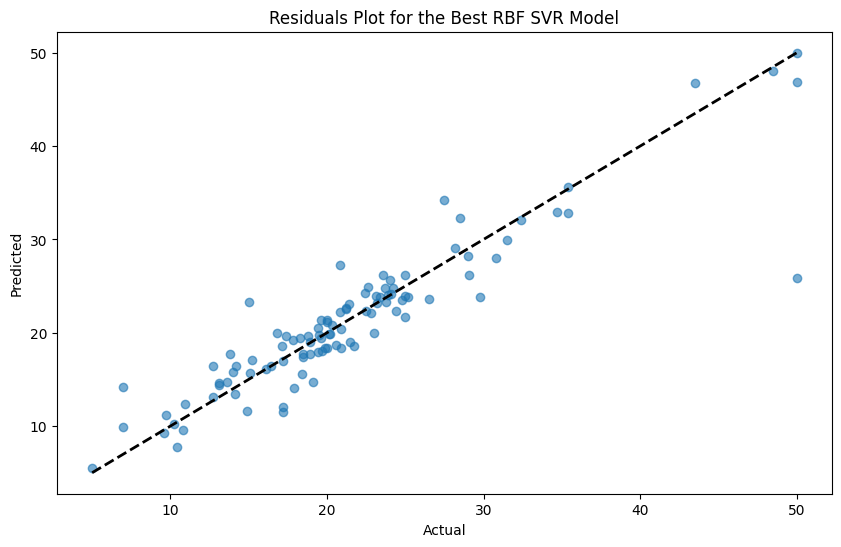

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = fetch_openml(name='boston', version=1, as_frame=True)
X = data.data
y = data.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr_linear = SVR(kernel='linear').fit(X_train_scaled, y_train)
svr_rbf = SVR(kernel='rbf').fit(X_train_scaled, y_train)

y_pred_linear = svr_linear.predict(X_test_scaled)
y_pred_rbf = svr_rbf.predict(X_test_scaled)

print("Linear Kernel:")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_linear))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_linear))
print("R-squared (R2):", r2_score(y_test, y_pred_linear))

print("\nRBF Kernel:")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_rbf))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_rbf))
print("R-squared (R2):", r2_score(y_test, y_pred_rbf))

param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
}
grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=3)
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
print("\nBest Parameters for RBF Kernel:", best_params)
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)

print("Performance of Best Model:")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_best))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_best))
print("R-squared (R2):", r2_score(y_test, y_pred_best))

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Residuals Plot for the Best RBF SVR Model')
plt.show()


we can see that the data points are linear. And svm gave pretty well of linear equation. During training, we tried different C values, first upto 10, but when we saw the the errors decreased, we increase the c values some more and discover that C 100 worked well on this dataset. though its not perfect but its relatively well fitted. 
* This model worked the best on RBF kernal rather Linear kernel. 
* But difference between them is really low. 
* But why rbf worked better than linear kernel in regression. Because linear kernel gives equal importance to all the data points. but rbf kernal gives higher priority to ones that closer. 